## Pingouin

##### Pingouin is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy.

https://pingouin-stats.org/

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from IPython.display import display
sns.set()

### 1. Data preparation

In [2]:
np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

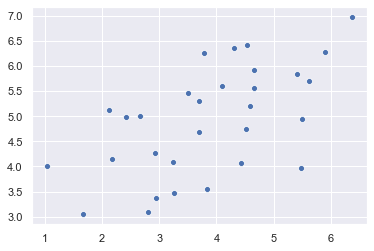

In [3]:
sns.scatterplot(x=x, y=y)

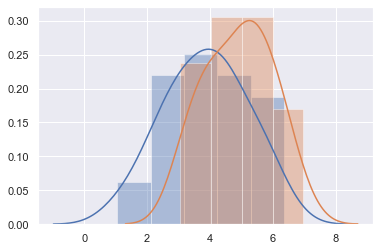

In [4]:
sns.distplot(x)
sns.distplot(y)

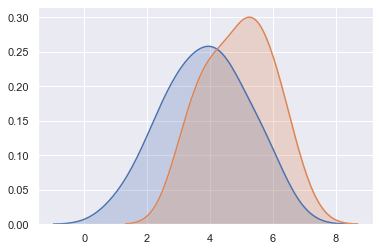

In [5]:
sns.kdeplot(x, shade=True)
sns.kdeplot(y, shade=True)

### 2. Pearson’s correlation

In [6]:
pg.corr(x, y)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,30,0.594785,"[0.3, 0.79]",0.353769,0.3059,0.000527,69.723,0.950373


### 3. Spearman correlation

In [7]:
pg.corr(x, y, method="spearman")

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,30,0.574194,"[0.27, 0.77]",0.329698,0.280046,0.000907,0.931108


### 4. One-way ANOVA using a pandas DataFrame

In [8]:
# Read an example dataset
df = pg.read_dataset('mixed_anova')
display(df)

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4
...,...,...,...,...
175,6.176981,June,Meditation,55
176,8.523692,June,Meditation,56
177,6.522273,June,Meditation,57
178,4.990568,June,Meditation,58


In [9]:
pg.anova(data=df, dv='Scores', between='Group', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Group,5.459963,1,5.459963,5.243656,0.0232,0.028616
1,Within,185.342729,178,1.041251,NaN,NaN,NaN


### 5. Multiple linear regression

In [10]:
np.random.seed(123)
z = np.random.normal(5, 1, 30)
data = pd.DataFrame({'X': x, 'Y': y, 'Z': z})
display(data)

,X,Y,Z
0,4.524991,6.417044,3.914369
1,4.420532,4.073261,5.997345
2,3.778971,6.256061,5.282978
3,6.362303,6.978672,3.493705
4,3.255330,3.480094,4.421400
5,4.649569,5.564859,6.651437
6,2.951786,3.380335,2.573321
7,4.591357,5.202862,4.571087
8,1.048996,4.004917,6.265936
9,2.929239,4.274655,4.133260


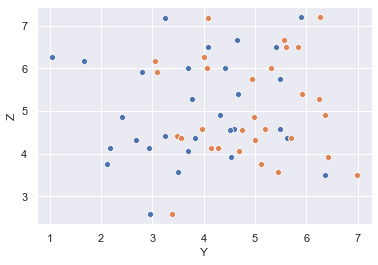

In [11]:
sns.scatterplot(x="X", y="Z", data=data)
sns.scatterplot(x="Y", y="Z", data=data)

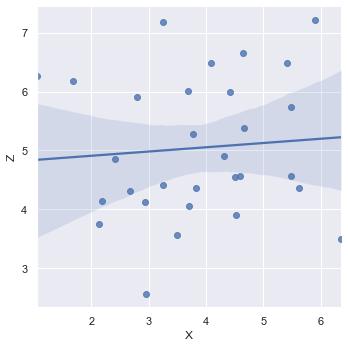

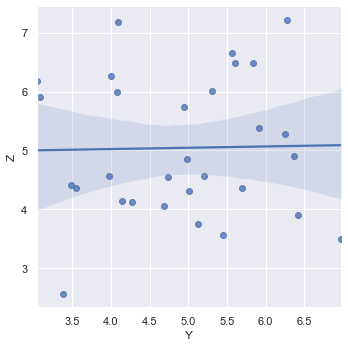

In [12]:
sns.lmplot(x="X", y="Z", data=data)
sns.lmplot(x="Y", y="Z", data=data)

In [13]:
pg.linear_regression(data[['X', 'Z']], data['Y'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,3.157985,0.844129,3.741118,0.000874,0.354522,0.306709,1.425976,4.889994
1,X,0.487772,0.126736,3.848710,0.000660,0.354522,0.306709,0.227730,0.747814
2,Z,-0.024931,0.140417,-0.177548,0.860403,0.354522,0.306709,-0.313044,0.263182


### 6. Logistic regression

In [14]:
df = pg.read_dataset('penguins')
df = pd.get_dummies(df, columns=['species'], drop_first=True)
df['male'] = (df['sex'] == 'male').astype(int)  # male: 1, female: 0
display(df)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo,male
0,Biscoe,37.8,18.3,174.0,3400.0,female,0,0,0
1,Biscoe,37.7,18.7,180.0,3600.0,male,0,0,1
2,Biscoe,35.9,19.2,189.0,3800.0,female,0,0,0
3,Biscoe,38.2,18.1,185.0,3950.0,male,0,0,1
4,Biscoe,38.8,17.2,180.0,3800.0,male,0,0,1
...,...,...,...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN,0,1,0
340,Biscoe,46.8,14.3,215.0,4850.0,female,0,1,0
341,Biscoe,50.4,15.7,222.0,5750.0,male,0,1,1
342,Biscoe,45.2,14.8,212.0,5200.0,female,0,1,0


In [15]:
X = df[['body_mass_g', 'species_Chinstrap', 'species_Gentoo']]
y = df['male']

In [16]:
pg.logistic_regression(X, y, remove_na=True)

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-26.239214,2.841007,-9.235885,2.561587e-20,-31.807485,-20.670943
1,body_mass_g,0.007098,0.000769,9.230270,2.699514e-20,0.005591,0.008606
2,species_Chinstrap,-0.131807,0.420848,-0.313194,7.541334e-01,-0.956654,0.693040
3,species_Gentoo,-9.717239,1.123228,-8.651173,5.097274e-18,-11.918725,-7.515752


In [17]:
pg.logistic_regression(X.to_numpy(), y.to_numpy(), coef_only=True, remove_na=True)

array([-2.62392142e+01,  7.09830513e-03, -1.31807077e-01, -9.71723854e+00])

### 7. Chi-squared independence tests between two categorical variables

In [18]:
data = pg.read_dataset('chi2_independence')
display(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
expected, observed, stats = pg.chi2_independence(data, x='sex', y='target')
display(stats)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,22.717227,1.0,1.876778e-06,0.273814,0.997494
1,cressie-read,0.666667,22.931427,1.0,1.678845e-06,0.275102,0.997663
2,log-likelihood,0.000000,23.557374,1.0,1.212439e-06,0.278832,0.998096
3,freeman-tukey,-0.500000,24.219622,1.0,8.595211e-07,0.282724,0.998469
4,mod-log-likelihood,-1.000000,25.071078,1.0,5.525544e-07,0.287651,0.998845
5,neyman,-2.000000,27.457956,1.0,1.605471e-07,0.301032,0.999481


### 8. Bland-Altman plot

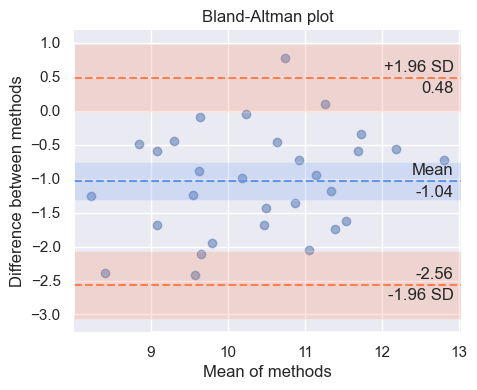

In [20]:
np.random.seed(123)
mean, cov = [10, 11], [[1, 0.8], [0.8, 1]]
x, y = np.random.multivariate_normal(mean, cov, 30).T
ax = pg.plot_blandaltman(x, y)

### 9. Robust outlier detection based on the MAD-median rule.

In [21]:
a = [-1.09, 1., 0.28, -1.51, -0.58, 6.61, -2.43, -0.43]
pg.madmedianrule(a)

array([False, False, False, False, False,  True, False, False])

### 10. Pretty display of table.

In [22]:
pg.print_table(data)

   age    sex     cp    trestbps     chol    fbs    restecg    thalach    exang    oldpeak    slope     ca    thal    target
------  -----  -----  ----------  -------  -----  ---------  ---------  -------  ---------  -------  -----  ------  --------
63.000  1.000  3.000     145.000  233.000  1.000      0.000    150.000    0.000      2.300    0.000  0.000   1.000     1.000
37.000  1.000  2.000     130.000  250.000  0.000      1.000    187.000    0.000      3.500    0.000  0.000   2.000     1.000
41.000  0.000  1.000     130.000  204.000  0.000      0.000    172.000    0.000      1.400    2.000  0.000   2.000     1.000
56.000  1.000  1.000     120.000  236.000  0.000      1.000    178.000    0.000      0.800    2.000  0.000   2.000     1.000
57.000  0.000  0.000     120.000  354.000  0.000      1.000    163.000    1.000      0.600    2.000  0.000   2.000     1.000
57.000  1.000  0.000     140.000  192.000  0.000      1.000    148.000    0.000      0.400    1.000  0.000   1.000     1.000
